In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
structured_logs = []
for i in range(4):
    # 로그 파일 경로
    log_file_path = "actor_"+ str(i) +".log"

    # 1. 로그 파일 읽기
    with open(log_file_path, "r") as log_file:
        # logs.append(log_file.readlines())
        logs = log_file.readlines()

    # 2. 정규 표현식으로 로그 구조화
    
    message_pattern = r"episodic returns: ([\d.]+), total_time: (\d+), episode: (\d+)"
    for log in logs:
        match = re.search(message_pattern, log)
        if match:
            # score, critic_loss, entropy, min_is, max_is, avg_is = match.groups()
            score, time, episode = match.groups()
            structured_logs.append((int(float(score)), int(time), int(episode)))

# 3. Pandas or Numpy 배열로 변환
df = pd.DataFrame(structured_logs, columns=["score", "time", "episode"])
# log_array = np.array(structured_logs, dtype=int)
# len(log_array) = 2500
# df.head()
# df["score"].mean(), df["score"].max(), df["score"].min(), df["score"].median(), df["score"].quantile(0.90)
# df_samples = df.iloc[::2, :]
df_sort = df.sort_values(by='episode', ascending=True, inplace=False)


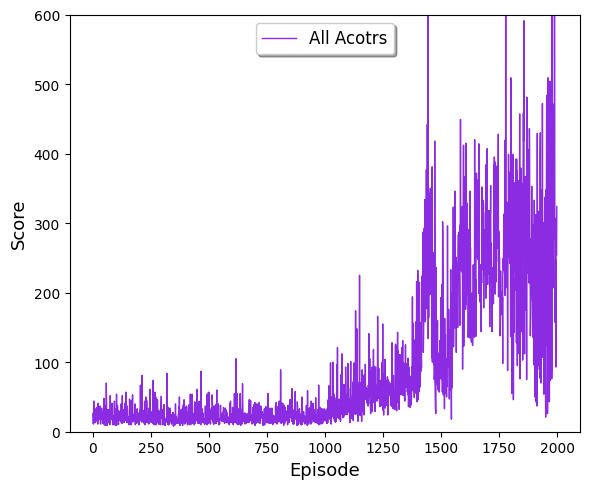

In [4]:
colors = sns.color_palette('bright', n_colors=5)
# line_styles = ['--', '-', '-.', '--']
# markers = ['.', 's', '^', '.']
 

# 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=11) # figure title 폰트 크기

# plt.plot(df_samples["episode"], df_samples["score"], color=colors[4] , marker='o', linestyle='-', label="All Acotrs", linewidth=1.0, markevery=100, markersize=3.0)
plt.plot(df_sort["episode"], df_sort["score"], color=colors[4] , linestyle='-', label="All Acotrs", linewidth=1.0)

# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=1)

# plt.legend()
# plt.xticks([500, 1000, 1500, 2000, 2500])
# plt.yticks(range(0, max(df["score"]) + 1, 50))
# plt.title("Episodic Returns(Sum of Rewards Each Episode)", loc="left")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.ylim([0, 600])
# plt.xlim([0, 2500])

# plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('score' +'.png')
plt.show()

In [5]:
# 4개 각각
dataframes = []
for i in range(4):
    # 로그 파일 경로
    log_file_path = "actor_"+ str(i) +".log"

    # 1. 로그 파일 읽기
    with open(log_file_path, "r") as log_file:
        # logs.append(log_file.readlines())
        logs = log_file.readlines()

    # 2. 정규 표현식으로 로그 구조화
    structured_logs = []
    message_pattern = r"episodic returns: ([\d.]+)"
    for log in logs:
        match = re.search(message_pattern, log)
        if match:
            # score, critic_loss, entropy, min_is, max_is, avg_is = match.groups()
            score = match.groups()
            structured_logs.append(int(float(score[0])))

    # 3. Pandas or Numpy 배열로 변환
    df = pd.DataFrame(structured_logs, columns=["score"])
    dataframes.append(df)

In [6]:
#### DQN ###
# 로그 파일 경로
log_file_path = "dqn.log"

# 1. 로그 파일 읽기
with open(log_file_path, "r") as log_file:
    # logs.append(log_file.readlines())
    logs = log_file.readlines()

# 2. 정규 표현식으로 로그 구조화
structured_logs = []
message_pattern = r"episodic returns: ([\d.]+)"
for log in logs:
    match = re.search(message_pattern, log)
    if match:
        score= match.groups()
        structured_logs.append(int(score[0]))

# 3. Pandas or Numpy 배열로 변환
df = pd.DataFrame(structured_logs, columns=["score"])
dataframes.append(df)

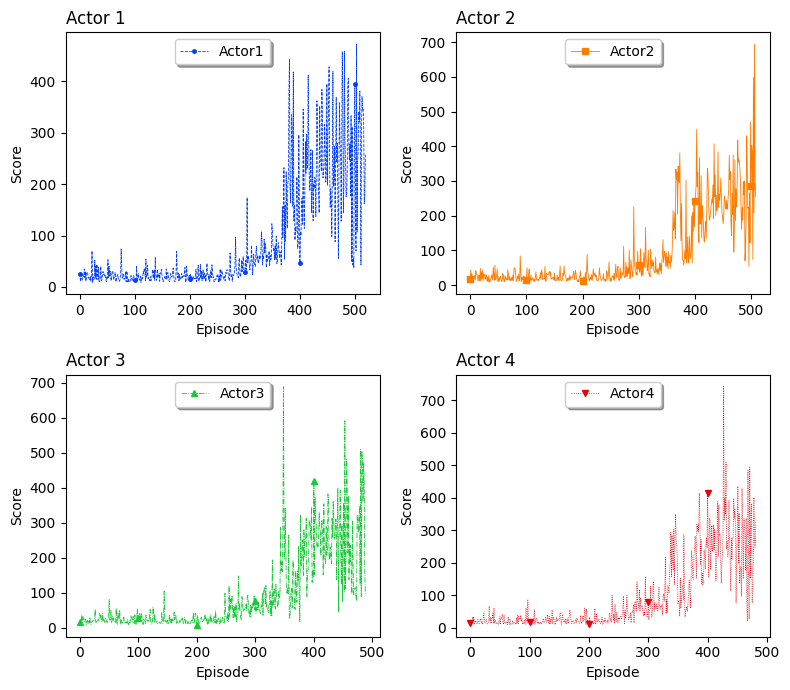

In [7]:
colors = sns.color_palette('bright', n_colors=4)
line_styles = ['--', '-', '-.', ':']
markers = ['.', 's', '^', 'v']


# 4개의 플롯 생성
plt.figure(figsize=(8, 7))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기

# 플롯 1
for i in range(4):    
    plt.subplot(2, 2, i+1)
    plt.plot(range(len(dataframes[i])), dataframes[i]["score"], color=colors[i] , marker=markers[i], linestyle=line_styles[i], linewidth=0.6, markevery=100, markersize=5.0, label="Actor" + str(i+1))

    # plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=1)

    plt.title("Actor " + str(i+1), loc="left")
    plt.xlabel("Episode")
    plt.ylabel("Score")
    # plt.xlim([0, 2500])

    plt.tight_layout()
plt.savefig('score2' +'.png')
plt.show()



In [8]:
dataframes_samples = []
for i in range(5):
     tmp = dataframes[i].iloc[::10, :]
     dataframes_samples.append(tmp)

# df_samples = df.iloc[::40, :]

In [9]:
len(dataframes[4])

500

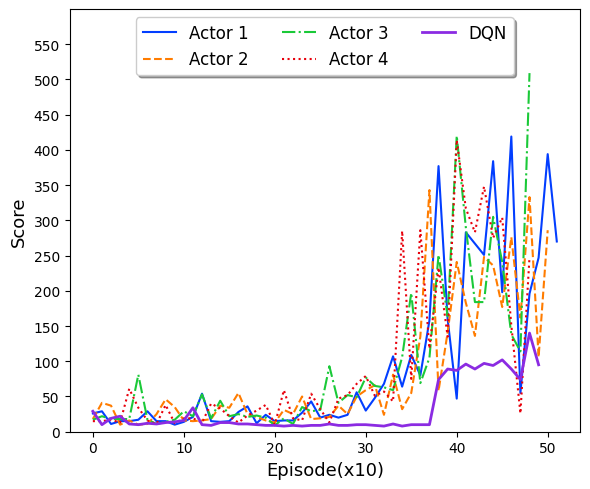

In [10]:
colors = sns.color_palette('bright', n_colors=6)
line_styles = ['-', '--', '-.', ':', '-']
markers = ['.', 's', '^', 'v', '.']


# 4개의 플롯 생성
plt.figure(figsize=(6, 5))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기

# 플롯 1
for i in range(5):
    if i == 4:
        plt.plot(range(len(dataframes_samples[i])), dataframes_samples[i]["score"], color=colors[i] , linestyle=line_styles[i], linewidth=2.0, label="DQN")
    else:     
        plt.plot(range(len(dataframes_samples[i])), dataframes_samples[i]["score"], color=colors[i] , linestyle=line_styles[i], linewidth=1.5, label="Actor " + str(i+1))

# plt.plot(range(len(df_samples)), df_samples["score"], color=colors[4] , marker='.', linestyle='-', label="All Acotrs", linewidth=1.6, markevery=10, markersize=5.0)


# plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), fancybox=True, shadow=True, ncol=3)

# plt.title("By Actor" , loc="center")
plt.xlabel("Episode(x10)")
plt.ylabel("Score")
# plt.xlim([0, 2500])
plt.ylim([0, 600])

yticks = np.arange(0, 600, 50)
plt.yticks(yticks)


plt.tight_layout()
plt.savefig('score4' +'.png')
plt.show()

